# Что происходит с экологией в России и какова роль государства и НКО?

In [245]:
#Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 1. Работа с открытыми данными
- Поиск
- Преобразование
- Разведочный анализ данных


***Источник №1.*** [Росстат. Основные показатели охраны окружающей среды. 2023](https://docs.yandex.ru/docs/view?tm=1742671703&tld=ru&lang=ru&name=oxr_bul_2023.pdf&text=%D1%8D%D0%BA%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F%20%D1%80%D0%BE%D1%81%D1%81%D0%B8%D1%8F%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5&url=https%3A%2F%2Frosstat.gov.ru%2Fstorage%2Fmediabank%2Foxr_bul_2023.pdf&lr=11499&mime=pdf&l10n=ru&sign=03ba52388791b96b6942021f812bb66c&keyno=0&nosw=1&serpParams=tm%3D1742671703%26tld%3Dru%26lang%3Dru%26name%3Doxr_bul_2023.pdf%26text%3D%25D1%258D%25D0%25BA%25D0%25BE%25D0%25BB%25D0%25BE%25D0%25B3%25D0%25B8%25D1%258F%2B%25D1%2580%25D0%25BE%25D1%2581%25D1%2581%25D0%25B8%25D1%258F%2B%25D0%25B4%25D0%25B0%25D0%25BD%25D0%25BD%25D1%258B%25D0%25B5%26url%3Dhttps%253A%2F%2Frosstat.gov.ru%2Fstorage%2Fmediabank%2Foxr_bul_2023.pdf%26lr%3D11499%26mime%3Dpdf%26l10n%3Dru%26sign%3D03ba52388791b96b6942021f812bb66c%26keyno%3D0%26nosw%3D1)

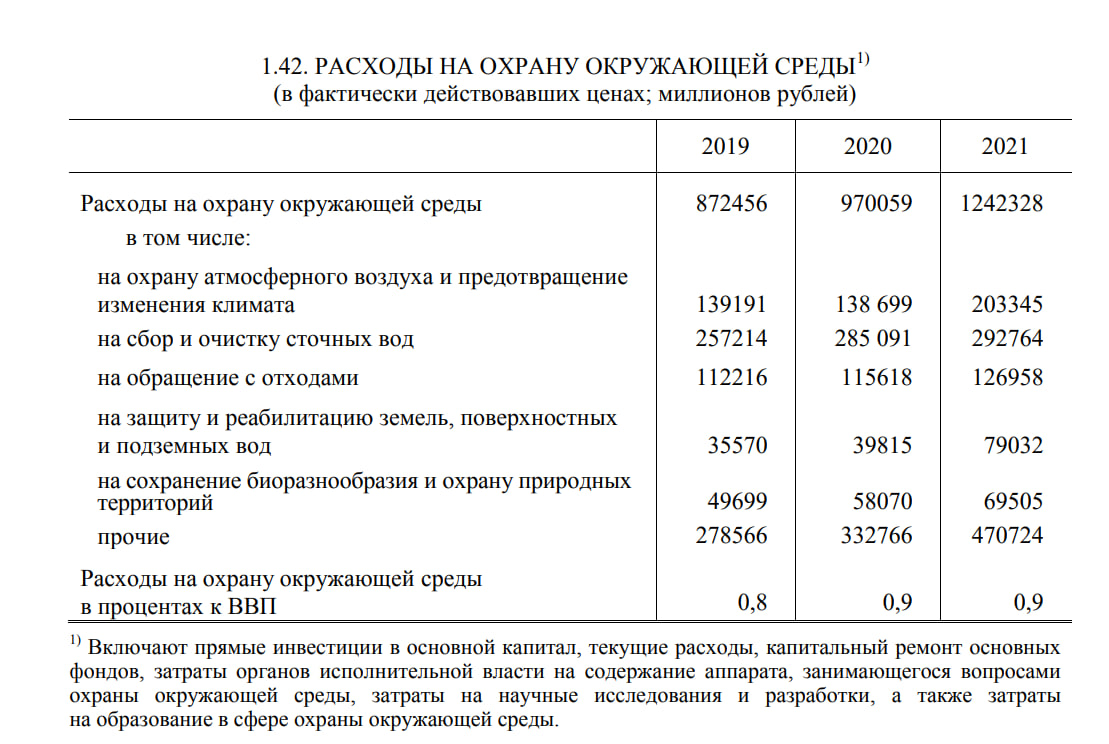

Прежде, чем начать работать с данными, нужно было их достать из pdf-файла. Поскольку таблица небольшая, я применила самый просто способ, а именно попросила DeepSeek считать со скриншота данные таблицы. Затем я скопировала данные в Google Sheets и преобразовала так, чтобы сохранить в csv формате. 

[Ссылка на таблицу](https://docs.google.com/spreadsheets/d/1t8Bz2qaLbntjJ4CYP2U4VqvACTvLFGN9KObSsbNMhC8/edit?usp=sharing)

In [213]:
data1 = pd.read_csv('эко - expenses_2019-2021.csv')
data1

,Расходы на охрану окружающей среды,2019,2020,2021
0,на охрану атмосферного воздуха и предотвращени...,139191.0,138699.0,203345.0
1,на сбор и очистку сточных вод,257214.0,285091.0,292764.0
2,на обращение с отходами,112216.0,115618.0,126958.0
3,"на защиту и реабилитацию земель, поверхностных...",35570.0,39815.0,79032.0
4,на сохранение биоразнообразия и охрану природн...,49699.0,58070.0,69505.0
5,прочие расходы,278566.0,332766.0,470724.0
6,Расходы на охрану окружающей среды в процентах...,0.8,0.9,0.9


In [221]:
data1['Расходы на охрану окружающей среды'].to_list() #Полный список наблюдений

['на охрану атмосферного воздуха и предотвращение изменения климата',
 'на сбор и очистку сточных вод',
 'на обращение с отходами',
 'на защиту и реабилитацию земель, поверхностных и подземных вод',
 'на сохранение биоразнообразия и охрану природных территорий',
 'прочие расходы',
 'Расходы на охрану окружающей среды в процентах к ВВП']

In [237]:
data1['Изменение 2019-2021 (%)'] = ((data1['2021'] - data1['2019']) / data1['2019']) * 100 #Добавила процентное изменение значений между 2019 и 2021 годами
data1_s = data1.copy()

In [243]:
data1['Доля 2019 (%)'] = (data1['2019'] / data1['2019'].sum()) * 100
data1['Доля 2020 (%)'] = (data1['2020'] / data1['2020'].sum()) * 100
data1['Доля 2021 (%)'] = (data1['2021'] / data1['2021'].sum()) * 100
data1 #Расчитала долю каждого значения за 2019, 2020 и 2021 годы от общей суммы всех значений в соответствующем году, выразив результат в процентах. 

,Расходы на охрану окружающей среды,2019,2020,2021,Изменение 2019-2021 (%),Доля 2019 (%),Доля 2020 (%),Доля 2021 (%)
0,на охрану атмосферного воздуха и предотвращени...,139191.0,138699.0,203345.0,46.090624,15.953913,14.297983,16.368049
1,на сбор и очистку сточных вод,257214.0,285091.0,292764.0,13.821176,29.481574,29.389010,23.565740
2,на обращение с отходами,112216.0,115618.0,126958.0,13.137164,12.862070,11.918645,10.219355
3,"на защиту и реабилитацию земель, поверхностных...",35570.0,39815.0,79032.0,122.187236,4.076993,4.104386,6.361600
4,на сохранение биоразнообразия и охрану природн...,49699.0,58070.0,69505.0,39.851908,5.696443,5.986228,5.594734
5,прочие расходы,278566.0,332766.0,470724.0,68.981139,31.928916,34.303655,37.890449
6,Расходы на охрану окружающей среды в процентах...,0.8,0.9,0.9,12.500000,0.000092,0.000093,0.000072


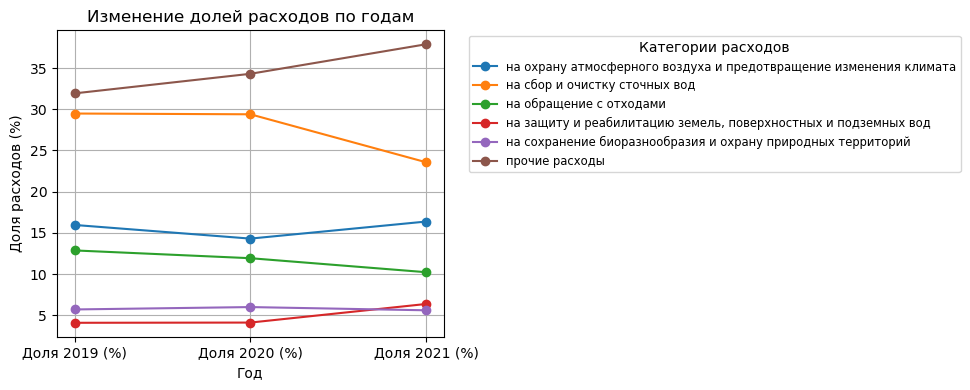

In [287]:
data1_new = data1.drop(index=6)
categories = data1_new['Расходы на охрану окружающей среды']
years = ['Доля 2019 (%)', 'Доля 2020 (%)', 'Доля 2021 (%)']

plt.figure(figsize=(10, 4))
for i, category in enumerate(categories):
    plt.plot(years, data1_new.loc[i, years], marker='o', label=category)
plt.title('Изменение долей расходов по годам')
plt.ylabel('Доля расходов (%)')
plt.xlabel('Год')
plt.legend(title='Категории расходов', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

Особенный интерес для данного исследования представляют расходы на обращение с отходами. ***В то время как многие другие категории растут в размерах финансирования, категория "На обращение с отходами" сильно снижается.***

Действительно, в последние годы в России сократили расходы на утилизацию мусора. Власти урезали финансирование проекта «Экология».

*```«Национальный проект «Экология» оказался единственным, финансирование которого из федерального бюджета будет сокращено в следующие три года.»```*  

*```«В первую очередь правительство намерено сэкономить на реформе обращения с отходами, следует из пояснительной записки к проекту бюджета, а именно на инвестициях в строительство перерабатывающих мощностей. Финансирование будет сокращено на 20% в 2020 г. и на 26% в 2021 г. до 10 млрд и 12 млрд руб. соответственно. В 2022 г. расходы уменьшаются незначительно – на 4% до 17 млрд руб.»```*

[Источник](https://www.vedomosti.ru/economics/articles/2019/10/17/814026-finansirovanie-reformi). 2019 год.


***Источник №2.*** [Росприроднадзор](https://rpn.gov.ru/open-service/analytic-data/statistic-reports/production-consumption-waste/)

Каждый год с 2020 года Росприроднадзор публикует отчеты по регионам России. Я решила выделить наиболее информативные наблюдения и объединить три таблицы в одну с помощью **функции ВПР** в Google Sheets. 

[Ссылка на таблицу](https://docs.google.com/spreadsheets/d/1t8Bz2qaLbntjJ4CYP2U4VqvACTvLFGN9KObSsbNMhC8/edit?usp=sharing)

In [855]:
data2 = pd.read_csv('эко_таблицы - edited_2021-2023.csv')
data2.sample(3)

,Федеральный округ,Субъект РФ,2021_Наличие отходов на начало отчетного года,2021_Образование отходов за отчетный год,2022_Наличие отходов на начало отчетного года,2022_Образование отходов за отчетный год,2023_Наличие отходов на начало отчетного года,2023_Образование отходов за отчетный год,2021_Всего утилизировано отходов,2021_Утилизировано отходов для повторного применения (рециклинг),2022_Всего утилизировано отходов,2022_Утилизировано отходов для повторного применения (рециклинг),2023_Всего утилизировано отходов,2023_Утилизировано отходов для повторного применения (рециклинг)
84,Южный,Ростовская область,61539704,15054905,61539704,15054905,8.332625e+07,4.901259e+06,12595447,547876.0,NaN,414873.0,NaN,548945.907
25,Приволжский,Чувашская Республика,88756,292622,88756,292622,2.066723e+06,3.223739e+05,134709,89485.0,144046.0,78360.0,1.353803e+05,78878.265
45,Сибирский,Иркутская область,1631037305,369098907,1631037305,369098907,1.710304e+09,3.063041e+08,320004432,93040333.0,NaN,39942238.0,2.119906e+08,2596759.546


In [395]:
new_column_names = {
    '2021_Наличие отходов на начало отчетного года': '2021_отходы',
    '2021_Образование отходов за отчетный год': '2021_образование_за_год',
    '2022_Наличие отходов на начало отчетного года': '2022_отходы',
    '2022_Образование отходов за отчетный год': '2022_образование_за_год',
    '2023_Наличие отходов на начало отчетного года': '2023_отходы',
    '2023_Образование отходов за отчетный год': '2023_образование_за_год',
    '2021_Всего утилизировано отходов': '2021_утилизация',
    '2021_Утилизировано отходов для повторного применения (рециклинг)': '2021_рециклинг',
    '2022_Всего утилизировано отходов': '2022_утилизация',
    '2022_Утилизировано отходов для повторного применения (рециклинг)': '2022_рециклинг',
    '2023_Всего утилизировано отходов': '2023_утилизация',
    '2023_Утилизировано отходов для повторного применения (рециклинг)': '2023_рециклинг'
}
data2.rename(columns=new_column_names, inplace=True) #Переименовала столбцы для удобства анализа данных

In [401]:
cols_to_convert = [
    '2021_отходы', '2021_образование_за_год', '2022_отходы', '2022_образование_за_год',
    '2023_отходы', '2023_образование_за_год', '2021_утилизация', '2021_рециклинг',
    '2022_утилизация', '2022_рециклинг', '2023_утилизация', '2023_рециклинг']
data2[cols_to_convert] = data2[cols_to_convert].astype('float64') #перевела столбцы с числами в нужный формат float
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Федеральный округ        85 non-null     object 
 1   Субъект РФ               86 non-null     object 
 2   2021_отходы              86 non-null     float64
 3   2021_образование_за_год  86 non-null     float64
 4   2022_отходы              86 non-null     float64
 5   2022_образование_за_год  86 non-null     float64
 6   2023_отходы              86 non-null     float64
 7   2023_образование_за_год  86 non-null     float64
 8   2021_утилизация          86 non-null     float64
 9   2021_рециклинг           85 non-null     float64
 10  2022_утилизация          40 non-null     float64
 11  2022_рециклинг           85 non-null     float64
 12  2023_утилизация          81 non-null     float64
 13  2023_рециклинг           85 non-null     float64
dtypes: float64(12), object(2)
me

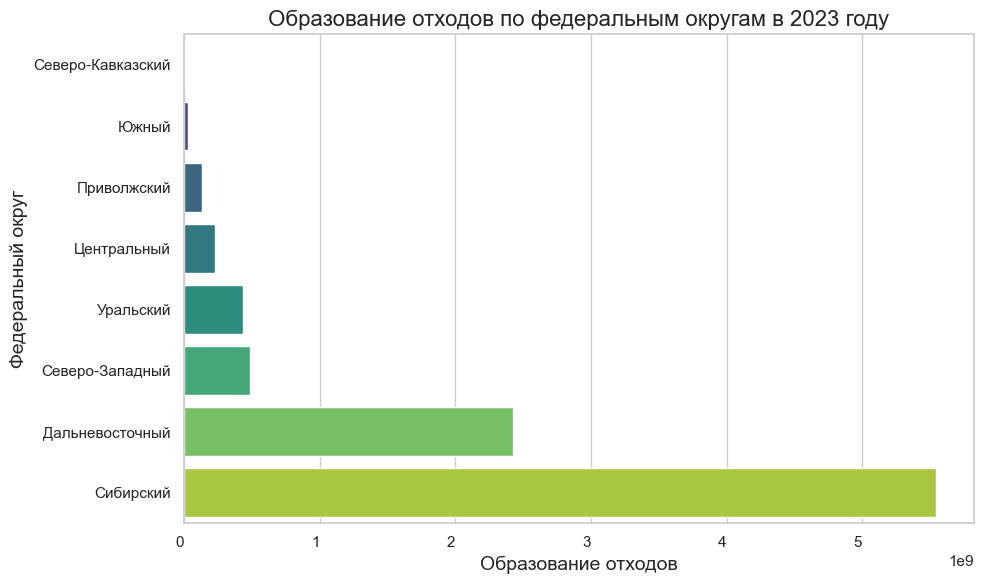

In [403]:
fed_o_2023 = data2.groupby('Федеральный округ')['2023_образование_за_год'].sum().reset_index()
fed_o_2023 = fed_o_2023.sort_values(by='2023_образование_за_год', ascending=True)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='2023_образование_за_год', y='Федеральный округ', data=fed_o_2023, palette='viridis')
plt.title('Образование отходов по федеральным округам в 2023 году', fontsize=16)
plt.xlabel('Образование отходов', fontsize=14)
plt.ylabel('Федеральный округ', fontsize=14)
plt.xticks( ha='right')
plt.tight_layout()
plt.show()

На графике видно, что Северо-Кавказский регион производит минимальное количество отходов. Особенно в сравнении с Сибирским Федеральным округом. На мой взгляд, данные могут быть недостаточно корректно собраны с Северо-Кавказском и Южном округах.

In [413]:
data2['2021_доля_рециклинга'] = (data2['2021_рециклинг'] / data2['2021_утилизация']) * 100
data2['2022_доля_рециклинга'] = (data2['2022_рециклинг'] / data2['2022_утилизация']) * 100
data2['2023_доля_рециклинга'] = (data2['2023_рециклинг'] / data2['2023_утилизация']) * 100
top_recycling = data2.nlargest(5, '2023_доля_рециклинга')[['Субъект РФ', '2023_доля_рециклинга']]
top_recycling

,Субъект РФ,2023_доля_рециклинга
2,Еврейская автономная область,99.717681
39,Республика Дагестан,99.641852
61,Брянская область,92.291988
11,Чукотский автономный округ,91.202128
52,Республика Хакасия,90.782737


*```«За прошедший год половина регионов (44) смогли сократить долю отходов, направляемых на полигоны для захоронения, и нарастить утилизацию мусора. Лучшую динамику продемонстрировала Брянская область, где доля захораниваемых отходов сократилась на 40,9 п. п., до 56,4% (годом ранее закапывалось 97,3% мусора, то есть практически все сгенерированные ТКО).»```* [Источник](https://finexpertiza.ru/press-service/researches/2023/zakh-80-musora/)

Таким образом, fineexpertiza подтверждает, что Брянская область заняла лидирующую позицию по доле переработки мусора вместо захоронения. 
Касательно остальных регионов: нет аналитических подтверждений улучшения ситуации с рециклингом. Есть лишь упоминания, что в статистике по экологии в этих регионах фиксируется полное отсутствие инфраструктуры, которая могла бы обеспечить рециклинг. 

*```«Абсолютно весь сгенерированный мусор также пошел на захоронение в Карелии, Дагестане, Республике Алтай, Тыве, Хакасии, Магаданской области. Чуть меньше 100% показатель был в Чечне, Забайкальском крае, Коми и Владимирской области (доля захороненных ТКО в этих регионах составила 99,8%). В общей сложности порядка 4/5 регионов закапывают на полигонах более 80% образованного мусора. Ниже среднероссийского уровня показатель захоронений лишь в каждом пятом субъекте.»```* [Источник](https://finexpertiza.ru/press-service/researches/2023/zakh-80-musora/)


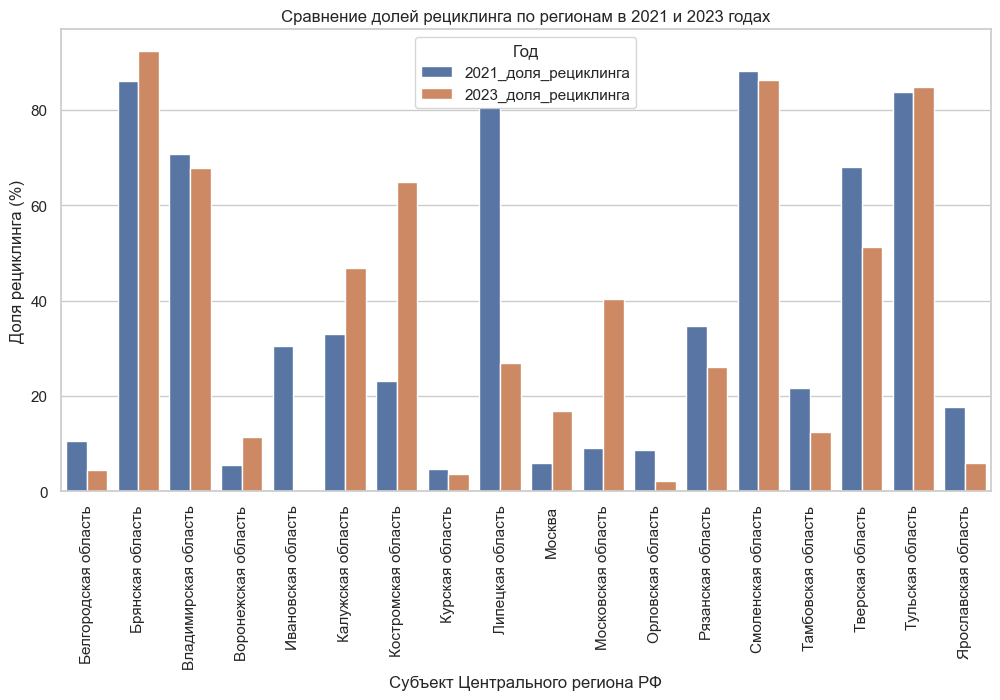

In [431]:
centr = data2[data2['Федеральный округ'] == 'Центральный'] #аналитика по Центральному региональному округу

centr_filtered = centr[['Субъект РФ', '2021_доля_рециклинга', '2023_доля_рециклинга']].dropna()
df_melted = centr_filtered.melt(id_vars=['Субъект РФ'], 
                                value_vars=['2021_доля_рециклинга', '2023_доля_рециклинга'], 
                                var_name='Год', value_name='Доля рециклинга') # Переводим данные в длинный формат для удобства построения графиков

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Субъект РФ', y='Доля рециклинга', hue='Год')
plt.xticks(rotation=90)
plt.xlabel("Субъект Центрального региона РФ")
plt.ylabel("Доля рециклинга (%)")
plt.title("Сравнение долей рециклинга по регионам в 2021 и 2023 годах")
plt.legend(title="Год")
plt.show()

***Из графика видно, что в Центральном регионе динамика по рециклингу неоднородно изменялась с 2021 по 2023 годы. Обратим внимание на Москву и Московскую область. Доля переработки мусора в этих субъектах сильно выросла.***

        Теперь нужно узнать о тех людях, которые борятся за улучшение экологической ситуации в столице и Москвской области.

## Часть 2. Парсинг ВКонтакте

### Парсинг данных

In [38]:
import datetime                  # Пакет для работы с временными форматами
import pickle                    # Пакет для подгрузки данных специфического для питона формата
import requests                  # Пакет для скачки данных из этих ваших интернетов
import pandas as pd              # Пакет для работы с таблицами
import numpy as np               # Пакет для работы с векторами и матрицами
import matplotlib.pyplot as plt  # Пакет для строительства графиков
import time            # Пакет для работы со временем. Например, помогает ставить заглушки 
                       # time.sleep(секунды), необходимые для того что ВК не банил нащего
                       # сборщика данных из-за слишком частых запросов
        
# Пакет для красивых циклов. При желании его можно отключить. Тогда из всех циклов придётся 
# удалять команду tqdm_notebook.
from tqdm import tqdm_notebook   # подробнее: https://github.com/tqdm/tqdm
import time

In [22]:
# мой номер странички
my_user_id = 317783554
# версия используемого API
version = '5.103' 
# подгружаем токен
with open('token.txt') as f:
    token = f.read()

In [24]:
url = "https://api.vk.com/method/users.get?user_ids={user_id}&access_token={token}&v={version}"
url = url.format(user_id=my_user_id, token=token, version=version)

In [26]:
response = requests.get(url) 
response

<Response [200]>

In [28]:
def vkDownload(method, parameters, token=token, version=version):
    """
        Возвращает результат запроса по методу
        
        method: string
            метод из документации, который хотим использовать
            
        parameters: string
            параметры используемого метода
            
        token: string
            токен Oauth доступа
        
        version: string
            версия API
    """
    
    # составляем ссылку
    url = 'https://api.vk.com/method/{method}?{parameters}&access_token={token}&v={version}'
    url = url.format(method=method, parameters=parameters, token=token, version=version)
    # запрашиваем ссылку и переводим в json (словарь)
    response = requests.get(url).json()
    
    return response

def vk_download1(method, parameters):
    url = 'https://api.vk.com/method/' + method + \
'?' + parameters + '&v=' + version + '&access_token=' + token
    
    response = requests.get(url)
    return response.json()['response']

In [40]:
import requests
group_id = 'rsbor' #узнала id сообщества с помощью запроса api
url = f'https://api.vk.com/method/groups.getById?group_id={group_id}&access_token={token}&v={version}'
response = requests.get(url)
data = response.json()

print(data)

{'response': [{'id': 31712887, 'name': 'Экологическое движение «РазДельный Сбор»', 'screen_name': 'rsbor', 'is_closed': 0, 'type': 'group', 'photo_50': 'https://sun1-56.userapi.com/s/v1/if2/4LQVN0rwOD66L3bamD-V_GL23JBmeNEgtnPDD-d2fuBE1yfgkvKpXfonSJs2u4T2KbaBW7yY4flYHnf2Fqfz0wUq.jpg?quality=96&crop=72,352,1072,1072&as=32x32,48x48,72x72,108x108,160x160,240x240,360x360,480x480,540x540,640x640,720x720&ava=1&cs=50x50', 'photo_100': 'https://sun1-56.userapi.com/s/v1/if2/4LQVN0rwOD66L3bamD-V_GL23JBmeNEgtnPDD-d2fuBE1yfgkvKpXfonSJs2u4T2KbaBW7yY4flYHnf2Fqfz0wUq.jpg?quality=96&crop=72,352,1072,1072&as=32x32,48x48,72x72,108x108,160x160,240x240,360x360,480x480,540x540,640x640,720x720&ava=1&cs=100x100', 'photo_200': 'https://sun1-56.userapi.com/s/v1/if2/4LQVN0rwOD66L3bamD-V_GL23JBmeNEgtnPDD-d2fuBE1yfgkvKpXfonSJs2u4T2KbaBW7yY4flYHnf2Fqfz0wUq.jpg?quality=96&crop=72,352,1072,1072&as=32x32,48x48,72x72,108x108,160x160,240x240,360x360,480x480,540x540,640x640,720x720&ava=1&cs=200x200'}]}


In [42]:
group_id = '-31712887'
wall = vk_download1('wall.get','owner_id=' + group_id)
wall.keys()

dict_keys(['count', 'items'])

In [52]:
print(wall['count'])
wall

n = vk_download1('wall.get','owner_id=' + group_id)['count']
n

10473


10473

In [48]:
for post in wall['items']:  # Итерируемся по списку записей
    date = post['date']    
    print(date)
len(wall['items'])

1742644800
1742558400
1742472000
1742385656
1742299200
1742209235
1741798412
1741773557
1741705249
1741618809
1741349453
1740834812
1740765641
1740582001
1740571242
1740416390
1740131620
1739968387
1739804436
1739696400


20

In [54]:
infa = { 
    'id': [ ],
    'from_id': [ ],
    'type': [ ],
    'text': [ ],
    'likes': [ ],
    'views': [ ],
    'reposts': [ ],
    'date': [ ],
    'marked_as_ads': [ ]
}

for i in tqdm_notebook(range(0, 10500, 100)):
    time.sleep(0.4)
    wall = vk_download1('wall.get','owner_id=' + group_id + \
                       '&count=100&offset=' + str(i)
                      )['items']
    infa['id'].extend([item['id'] for item in wall])
    infa['from_id'].extend([item['from_id'] for item in wall])
    infa['type'].extend([item['type'] for item in wall])
    infa['text'].extend([item['text'] for item in wall])
    infa['date'].extend([item['date'] for item in wall])
    infa['likes'].extend([item['likes']['count'] for item in wall])
    infa['views'].extend([item.get('views', {}).get('count', 0) for item in wall])
    infa['reposts'].extend([item['reposts']['count'] for item in wall])
    infa['marked_as_ads'].extend([item['marked_as_ads'] for item in wall])   

C:\Users\annaa\AppData\Local\Temp\ipykernel_88668\2597818357.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, 10500, 100)):


  0%|          | 0/105 [00:00<?, ?it/s]

In [56]:
len(infa['id']) #действительно, все 10473 публикации были загружены

10473

In [60]:
df = pd.DataFrame(infa)
display(df.head(3))

df['date_readable'] = pd.to_datetime(df['date'], unit='s')
df['year'] = df['date_readable'].dt.year
df['month'] = df['date_readable'].dt.month
df.sample(5)

,id,from_id,type,text,likes,views,reposts,date,marked_as_ads
0,110052,-31712887,post,Приглашаем на бесплатный вебинар «Перерабатыва...,27,1890,6,1742644800,0
1,110050,-31712887,post,"Когда на заводе делают жевательную резинку, об...",296,10290,45,1742558400,0
2,110048,-31712887,post,Легко ли выстроить новую систему обращения с о...,30,2420,2,1742472000,0


,id,from_id,type,text,likes,views,reposts,date,marked_as_ads,date_readable,year,month
5452,31473,-31712887,post,♻Совсем скоро в Петербурге начнутся акции «Раз...,23,0,6,1457164705,0,2016-03-05 07:58:25,2016,3
10277,2360,-31712887,post,,8,0,4,1345112443,0,2012-08-16 10:20:43,2012,8
421,103436,-31712887,post,"Для тех, кто любит проводить время с пользой —...",123,9630,6,1685029320,0,2023-05-25 15:42:00,2023,5
4163,38998,-31712887,post,,22,3663,1,1491415743,0,2017-04-05 18:09:03,2017,4
3780,41226,-31712887,post,🚐 РАСПИСАНИЕ [club22123657|ЭКОМОБИЛЯ] с 31 ИЮЛ...,48,5969,18,1501490081,0,2017-07-31 08:34:41,2017,7


In [62]:
df.loc[df['views'].nlargest(5).index] #топ 5 постов по количеству просмотров

,id,from_id,type,text,likes,views,reposts,date,marked_as_ads,date_readable,year,month
2146,66541,-31712887,post,Сеть магазинов Rendez-Vous (Рандеву) запустила...,2573,186901,497,1567174767,0,2019-08-30 14:19:27,2019,8
2241,63572,-31712887,post,Попробуй это переварить!\n\nПроект [club204438...,2072,177934,509,1560849000,0,2019-06-18 09:10:00,2019,6
2181,65692,-31712887,post,"С радостью сообщаем, что движение «РазДельный ...",1997,137901,484,1565080440,0,2019-08-06 08:34:00,2019,8
2017,70044,-31712887,post,❗Важно.❗\n\nВчера у нас было сразу две грустны...,2105,124571,721,1575101100,0,2019-11-30 08:05:00,2019,11
2253,63118,-31712887,post,У нас отличные новости — 8 июня состоится [clu...,1461,120784,343,1559830005,0,2019-06-06 14:06:45,2019,6


### Социально-демографические показатели пользователей

In [123]:
fields = 'bdate, sex, interests, home_town, education, career, relation' # Основные параметры, которые мы хотим получить

In [75]:
nkos= {
     'Экологическое движение «РазДельный Сбор»' : 'rsbor',
     'Круг Жизни, Межрегиональный Центр, АНО' : 'vkrugorg',
     'Экоцентр Сборка' : 'ecosborka',
     '#МосЭко | #РосЭко' : 'moseco',
     'Экологическое движение «Мусора.Больше.Нет»' : 'musora_bolshe_net',
    'ЭкоСборная России' : 'ecosophy'
    } #крупнейшие группы в вк, которые пропагандируют экологчнсый образ жизни

eco_clubs_uni= {
     'Дружина охраны природы МГУ' : 'dop_msu',
     'MGIMO Goes Green' : 'mgimogoesgreen',
     'Зелёная Вышка' : 'hsegreen'
    } #группы крупнейших вузов Москвы, которые занимаются экологией

In [85]:
for group, i in nkos.items():
    group_id = i
    count = vkDownload('groups.getMembers','group_id=' + group_id)['response']['count']
    print(f'В группе {group} состоит {count} людей.')
print('----------')
for group, i in eco_clubs_uni.items():
    group_id = i
    count = vkDownload('groups.getMembers','group_id=' + group_id)['response']['count']
    print(f'В группе {group} состоит {count} людей.')

В группе Экологическое движение «РазДельный Сбор» состоит 89328 людей.
В группе Круг Жизни, Межрегиональный Центр, АНО состоит 14487 людей.
В группе Экоцентр Сборка состоит 8948 людей.
В группе #МосЭко | #РосЭко состоит 5875 людей.
В группе Экологическое движение «Мусора.Больше.Нет» состоит 17655 людей.
В группе ЭкоСборная России состоит 9794 людей.
----------
В группе Дружина охраны природы МГУ состоит 2602 людей.
В группе MGIMO Goes Green состоит 3082 людей.
В группе Зелёная Вышка состоит 7016 людей.


In [87]:
def getGroupMembers(group_id):
    """
        Возвращает список всех пользователей данной группы
        Итерации идут батчами по 1000 пользователей
        
        group_id: string
            идентификатор группы (ссылка)
    """
    
    # Узнаём число запросов, которое надо сделать 
    count = vkDownload('groups.getMembers','group_id=' + group_id)['response']['count']
    
    # выясняем, сколько запросов нам понадобиться
    n = int(np.ceil(count/1000))  
    
    # вектор, где мы будем хранить id пользователей
    members = []     
    
    for i in tqdm_notebook(range(n)): 
        # при помощи метода groups.getMembers получаем пользователей группы
        current_members = vkDownload('groups.getMembers','group_id='+group_id+'&offset='+str(1000*i))
        members.extend(current_members['response']['items'])
        # перед следующим запросом немножко подождем
        time.sleep(0.4)
        
    return members

In [93]:
# Цикл для выгрузки всех участников групп
# Выкачиваем членов каждой группы 
nkos_people = {}
for group, group_id in nkos.items():
    nkos_people[group] = getGroupMembers(group_id)

# Сохраняем словарик с id пользователей
with open('nkos', 'wb') as f:
    pickle.dump(nkos, f)

C:\Users\annaa\AppData\Local\Temp\ipykernel_88668\1341403498.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [153]:
uni_people = {}
for group, group_id in eco_clubs_uni.items():
    uni_people[group] = getGroupMembers(group_id)

# Сохраняем словарик с id пользователей
with open('eco_clubs_uni', 'wb') as f:
    pickle.dump(eco_clubs_uni, f)

C:\Users\annaa\AppData\Local\Temp\ipykernel_88668\1341403498.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [157]:
for group, people in nkos_people.items():
    print("Некоммерческая экологическая организация : {}. Число подписчиков:  {}".format(group, len(people)))
print('---------------')
for group, people in uni_people.items():
    print("Эко-активистская вузовская группа : {}. Число подписчиков:  {}".format(group, len(people)))

Некоммерческая экологическая организация : Экологическое движение «РазДельный Сбор». Число подписчиков:  89328
Некоммерческая экологическая организация : Круг Жизни, Межрегиональный Центр, АНО. Число подписчиков:  14487
Некоммерческая экологическая организация : Экоцентр Сборка. Число подписчиков:  8948
Некоммерческая экологическая организация : #МосЭко | #РосЭко. Число подписчиков:  5875
Некоммерческая экологическая организация : Экологическое движение «Мусора.Больше.Нет». Число подписчиков:  17655
Некоммерческая экологическая организация : ЭкоСборная России. Число подписчиков:  9794
---------------
Эко-активистская вузовская группа : Дружина охраны природы МГУ. Число подписчиков:  2602
Эко-активистская вузовская группа : MGIMO Goes Green. Число подписчиков:  3082
Эко-активистская вузовская группа : Зелёная Вышка. Число подписчиков:  7016


In [177]:
unique_people = sum(nkos_people.values(), [])
print(f'{len(unique_people)} подписчиков на эко-нко.') # объединяем всех подписчиков в один список
unique_nko = list(set(unique_people))
print(f'{len(unique_nko)} уникальных подписчиков на эко-нко.')
print(f'Значит, {(len(unique_people)) - (len(unique_nko))} подписчиков состоят более чем в одной группе эко-нко.')

146087 подписчиков на эко-нко.
131891 уникальных подписчиков на эко-нко.
Значит, 14196 подписчиков состоят более чем в одной группе эко-нко.


In [161]:
unique_people = sum(uni_people.values(), [])
print(f'{len(unique_people)} подписчиков на вузовские группы эко-активизма.') # объединяем всех подписчиков в один список
unique = list(set(unique_people))
print(f'{len(unique)} уникальных подписчиков на вузовские группы эко-активизма.')
print(f'Значит, {(len(unique_people)) - (len(unique))} подписчиков состоят более чем в одной группе вузовского эко-активизма.')

12700 подписчиков на вузовские группы эко-активизма.
12202 уникальных подписчиков на вузовские группы эко-активизма.
Значит, 498 подписчиков состоят более чем в одной группе вузовского эко-активизма.


In [129]:
def getUserInformation():
    """
        Возвращает словарь с выгруженными социально-демографическими данными 
        по всем пользователям, подписанным на группы
    """
    
    # инициализируем пустой словарь, где будут хранитсья пользователи с их соцдемом
    nko_people_information = {}
    # проходимся по всем кандидатам
    for group, people in nkos_people.items():
        # текущий список пользователей с соц-демом
        current_info = []
        #посчитаем число пользователей для группы
        count = len(people)
        # Выяснили число запросов
        n = int(np.ceil(count/500))  
        
        for i in tqdm_notebook(range(n)):
            # берем текущий срез подписчиков
            ids = people[i*500:(i+1)*500]
            ids = ','.join([str(user) for user in ids])
            # выгружаем их и берем данные
            info = vkDownload('users.get','user_ids={}&fields={}'.format(ids, fields))
            info = info['response']
            # записываем в текущий лист
            current_info.extend(info)
            # ждем перед следующим запросом
            time.sleep(0.4)
        
        # записываем в финальный словарь
        nko_people_information[group] = current_info
    
    return nko_people_information

In [131]:
nko_people_information = getUserInformation()

C:\Users\annaa\AppData\Local\Temp\ipykernel_88668\435030054.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


  0%|          | 0/179 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [163]:
def getUserInformation1():
    """
        Возвращает словарь с выгруженными социально-демографическими данными 
        по всем пользователям, подписанным на группы
    """
    
    # инициализируем пустой словарь, где будут хранитсья пользователи с их соцдемом
    uni_people_information = {}
    # проходимся по всем кандидатам
    for group, people in uni_people.items():
        # текущий список пользователей с соц-демом
        current_info = []
        #посчитаем число пользователей для группы
        count = len(people)
        # Выяснили число запросов
        n = int(np.ceil(count/500))  
        
        for i in tqdm_notebook(range(n)):
            # берем текущий срез подписчиков
            ids = people[i*500:(i+1)*500]
            ids = ','.join([str(user) for user in ids])
            # выгружаем их и берем данные
            info = vkDownload('users.get','user_ids={}&fields={}'.format(ids, fields))
            info = info['response']
            # записываем в текущий лист
            current_info.extend(info)
            # ждем перед следующим запросом
            time.sleep(0.4)
        
        # записываем в финальный словарь
        uni_people_information[group] = current_info
    
    return uni_people_information

In [165]:
uni_people_information = getUserInformation1()

C:\Users\annaa\AppData\Local\Temp\ipykernel_88668\3714955544.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [167]:
#спрячем данные в дамп pickle
with open('nko_people_information', 'wb') as f:
     pickle.dump(nko_people_information, f)

#если нужно открыть дамп из pickle
#with open('nko_people_information', 'rb') as f:
    #candidate_people_information = pickle.load(f)

with open('uni_people_information', 'wb') as f:
     pickle.dump(uni_people_information, f)

In [169]:
uni_people_information

{'Дружина охраны природы МГУ': [{'id': 9,
   'bdate': '1.1.2001',
   'sex': 1,
   'first_name': 'Настя',
   'last_name': 'Васильева',
   'can_access_closed': False,
   'is_closed': True},
  {'id': 1465,
   'bdate': '3.12',
   'sex': 1,
   'first_name': 'Софья',
   'last_name': 'Косачёва',
   'can_access_closed': True,
   'is_closed': False},
  {'id': 2306,
   'bdate': '20.11.1979',
   'interests': 'Парапланеризм, форро, слэклайн, скалолазание',
   'career': [],
   'university': 1,
   'university_name': 'СПбГУ',
   'faculty': 18,
   'faculty_name': 'Экономический',
   'graduation': 2005,
   'education_form': 'Очное отделение',
   'education_status': 'Выпускник (специалист)',
   'home_town': 'Ставрополь',
   'relation': 1,
   'sex': 2,
   'first_name': 'Михаил',
   'last_name': 'Рыбасов',
   'can_access_closed': True,
   'is_closed': False},
  {'id': 10123,
   'bdate': '6.7.1982',
   'interests': '',
   'career': [{'city_id': 1,
     'from': 2021,
     'group_id': 38323874,
     'positio

In [145]:
df_nko = pd.DataFrame()

for group, people in nko_people_information.items():
    df = pd.DataFrame(people)
    df['group'] = group
    df_nko = pd.concat([df_nko, df], ignore_index=True)
df_nko.columns
nko_df_clean = df_nko[['id', 'group', 'bdate', 'first_name', 'last_name', 'home_town', 'interests', 'university_name', 'faculty_name', 'graduation', 'sex', 'relation']]  

In [173]:
df_uni = pd.DataFrame()

for group, people in uni_people_information.items():
    df = pd.DataFrame(people)
    df['group'] = group
    df_uni = pd.concat([df_uni, df], ignore_index=True)
df_uni.columns
uni_df_clean = df_uni[['id', 'group', 'bdate', 'first_name', 'last_name', 'home_town', 'interests', 'university_name', 'faculty_name', 'graduation', 'sex', 'relation']]  

In [185]:
nko_df_clean.to_csv('Эко НКО.csv', sep=',')
uni_df_clean.to_csv('Эко группы университетов.csv', sep=',')

In [189]:
d = pd.read_csv('Эко НКО.csv')
d_u = pd.read_csv('Эко группы университетов.csv')

### Преобразование данных о соц-деме пользователей

#### Возраст пользователей

In [520]:
b_dates = d

In [566]:
from datetime import datetime 
def age_maker(y, m):
    current_month = datetime.now().month
    age = 2025 - y
    if m > current_month:
        age -= 1 
    return age

In [574]:
b_dates_df = b_dates['bdate'].str.split('.', expand=True)
df_bdates = pd.concat([b_dates, b_dates_df], axis=1)
df_bdates = df_bdates.rename(columns={0: 'day_bdate', 1: 'month_bdate', 2: 'year_bdate'})
df_bdates = df_bdates.drop(['day_bdate'], axis=1)
df_bdates['year_bdate'] = pd.to_numeric(df_bdates['year_bdate'], errors= 'coerce')
df_bdates['month_bdate'] = pd.to_numeric(df_bdates['month_bdate'], errors= 'coerce')
df_bdates['age'] = df_bdates.apply(lambda row: age_maker(row['year_bdate'], row['month_bdate']), axis=1)
df_bdates.sample(3)

,id,group,bdate,first_name,last_name,home_town,interests,university_name,faculty_name,graduation,sex,relation,month_bdate,year_bdate,age
32403,8465195,Экологическое движение «РазДельный Сбор»,28.12,Лариса,Мочалова,NaN,NaN,NaN,NaN,NaN,1,NaN,12.0,NaN,NaN
121559,2074219,Экологическое движение «Мусора.Больше.Нет»,NaN,Юрий,Галкин,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
48343,42080900,Экологическое движение «РазДельный Сбор»,13.1.1984,Владимир,Жуков,Севастополь,фотография,КНУ (КТУ),Электротехнический,2009.0,2,4.0,1.0,1984.0,41.0
86455,582674843,Экологическое движение «РазДельный Сбор»,NaN,Ольга,Федорова,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
145249,682226545,ЭкоСборная России,9.6.2009,Anastasia,Syroedina,Нижний Тагил,NaN,NaN,NaN,0.0,1,0.0,6.0,2009.0,15.0


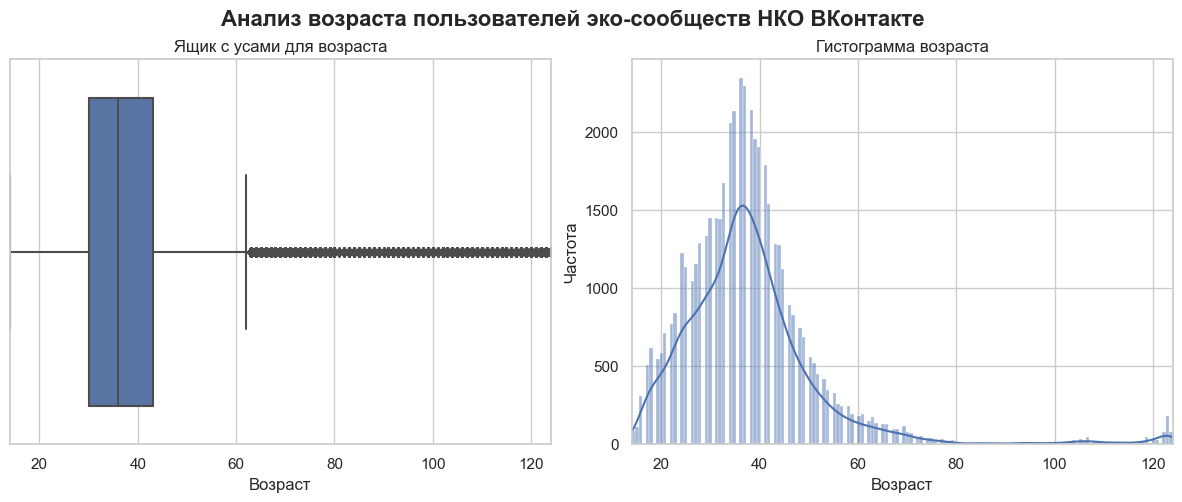

In [614]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.15)

sns.boxplot(x=df_bdates['age'], ax=axes[0])
axes[0].set_title('Ящик с усами для возраста')
axes[0].set_xlabel('Возраст')

sns.histplot(df_bdates['age'], kde=True, ax=axes[1])
axes[1].set_title('Гистограмма возраста')
axes[1].set_xlabel('Возраст')
axes[1].set_ylabel('Частота')


x_min = min(df_bdates['age'].min(), df_bdates['age'].min())
x_max = max(df_bdates['age'].max(), df_bdates['age'].max())
axes[0].set_xlim(x_min, x_max)
axes[1].set_xlim(x_min, x_max)

plt.suptitle('Анализ возраста пользователей эко-сообществ НКО ВКонтакте', fontsize=16, fontweight='bold')
plt.show()


Вывод: Видно, что много выбросов в обе стороны: и в сторону 0, что в сторону 80+ лет. Конечно, это связано не только с потенциальной разновозрастностью участников сообществ, но и с тем, что ВКонтакете люди часто указывают ненастоящие даты рождения.

Нужно очистить данные по возрасту от выбросов

Средний возраст до удаления выбросов: 31.40076164874552
Средний возраст после удаления выбросов: 27.36696799413633


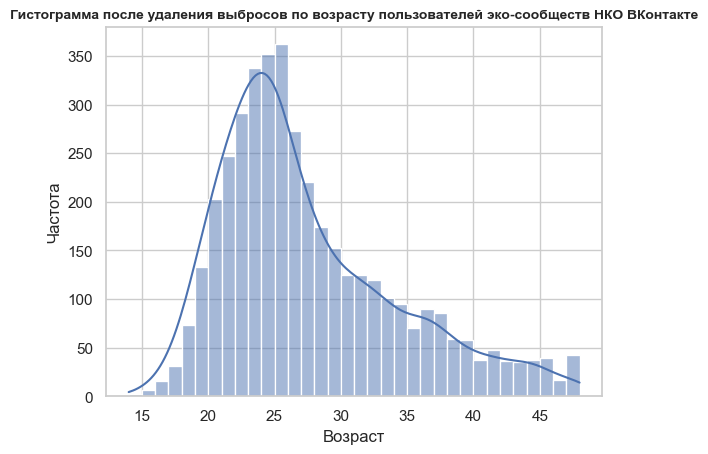

In [708]:
mean_age = df_bdates['age'].mean()
std_age = df_bdates['age'].std()
lower_bound = mean_age - 2 * std_age # Определяем границы для выбросов
upper_bound = mean_age + 1 * std_age
df_bdates_cleaned = df_bdates[(df_bdates['age'] >= lower_bound) & (df_bdates['age'] <= upper_bound)]
mean_age_cleaned = df_bdates_cleaned['age'].mean()
print(f'Средний возраст до удаления выбросов: {mean_age}')
print(f'Средний возраст после удаления выбросов: {mean_age_cleaned}')

sns.histplot(df_bdates_cleaned['age'], kde=True)
plt.title('Гистограмма после удаления выбросов по возрасту пользователей эко-сообществ НКО ВКонтакте', fontsize=10, fontweight='bold')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

Теперь нужно проанализировать возраст участников студенческих эко-сообществ Вконтакте. 

***Гипотеза: средний возраст будет ниже, чем у участников НКО.***

In [685]:
b_dates = d_u

In [697]:
b_dates_df = b_dates['bdate'].str.split('.', expand=True)
df_bdates = pd.concat([b_dates, b_dates_df], axis=1)
df_bdates = df_bdates.rename(columns={0: 'day_bdate', 1: 'month_bdate', 2: 'year_bdate'})
df_bdates = df_bdates.drop(['day_bdate'], axis=1)
df_bdates['year_bdate'] = pd.to_numeric(df_bdates['year_bdate'], errors= 'coerce')
df_bdates['month_bdate'] = pd.to_numeric(df_bdates['month_bdate'], errors= 'coerce')
df_bdates['age'] = df_bdates.apply(lambda row: age_maker(row['year_bdate'], row['month_bdate']), axis=1)
df_bdates.drop('Unnamed: 0', axis=1, inplace=True)
df_bdates.sample(3)

,id,group,bdate,first_name,last_name,home_town,interests,university_name,faculty_name,graduation,sex,relation,month_bdate,year_bdate,age
2703,2235805,MGIMO Goes Green,27.12,Михаил,Гожев,NaN,NaN,NaN,NaN,NaN,2,NaN,12.0,NaN,NaN
1244,101629471,Дружина охраны природы МГУ,29.10,Карина,Егорова,NaN,NaN,NaN,NaN,NaN,1,NaN,10.0,NaN,NaN
6785,29307693,Зелёная Вышка,20.5.1997,Виталия,Часовская,NaN,NaN,NaN,NaN,NaN,1,NaN,5.0,1997.0,27.0


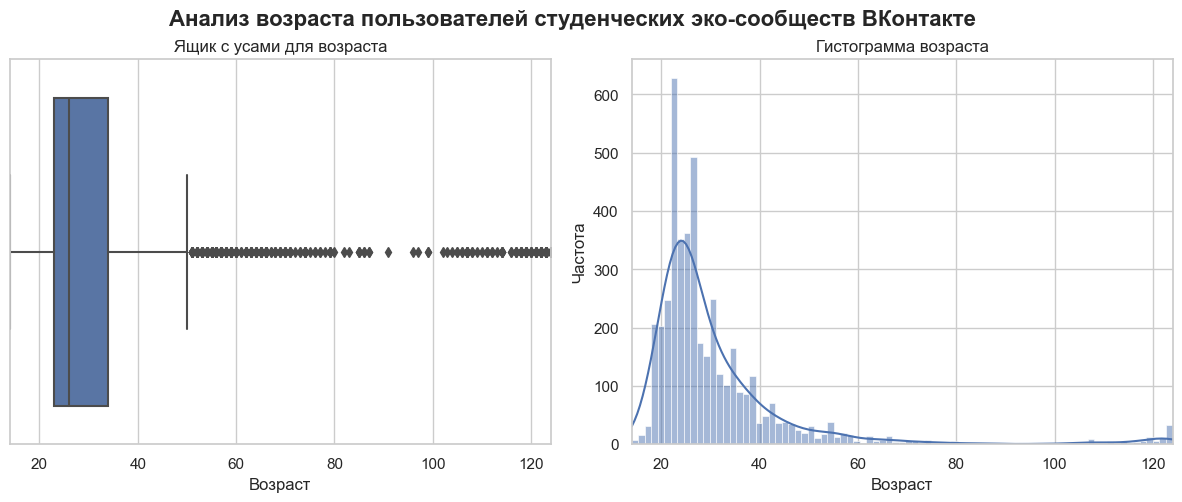

In [699]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.15)

sns.boxplot(x=df_bdates['age'], ax=axes[0])
axes[0].set_title('Ящик с усами для возраста')
axes[0].set_xlabel('Возраст')

sns.histplot(df_bdates['age'], kde=True, ax=axes[1])
axes[1].set_title('Гистограмма возраста')
axes[1].set_xlabel('Возраст')
axes[1].set_ylabel('Частота')


x_min = min(df_bdates['age'].min(), df_bdates['age'].min())
x_max = max(df_bdates['age'].max(), df_bdates['age'].max())
axes[0].set_xlim(x_min, x_max)
axes[1].set_xlim(x_min, x_max)

plt.suptitle('Анализ возраста пользователей студенческих эко-сообществ ВКонтакте', fontsize=16, fontweight='bold')
plt.show()

Вывод: видно, что есть много выбросов. Причем, интересно, что на ящике с усами отчетливо видно, что у молодых пользователей не пользуется популярностью возраст ~90 лет. Видимо, ставить возраст более 100 лет - более популярная практика.

Средний возраст до удаления выбросов: 31.40076164874552
Средний возраст после удаления выбросов: 27.36696799413633


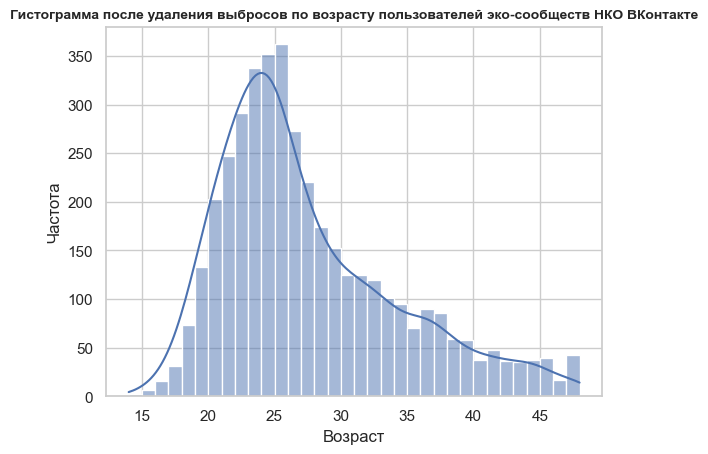

In [716]:
mean_age = df_bdates['age'].mean()
std_age = df_bdates['age'].std()
lower_bound = mean_age - 2 * std_age # Определяем границы для выбросов
upper_bound = mean_age + 1 * std_age
df_bdates_cleaned = df_bdates[(df_bdates['age'] >= lower_bound) & (df_bdates['age'] <= upper_bound)]
mean_age_cleaned = df_bdates_cleaned['age'].mean()
print(f'Средний возраст до удаления выбросов: {mean_age}')
print(f'Средний возраст после удаления выбросов: {mean_age_cleaned}')

sns.histplot(df_bdates_cleaned['age'], kde=True)
plt.title('Гистограмма после удаления выбросов по возрасту пользователей эко-сообществ НКО ВКонтакте', fontsize=10, fontweight='bold')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

***Вывод: гипотеза не подтвердилась. Средний возраст после удаления выбросов среди студенческих эко-групп и групп НКО практически одинаковые (примерно 27,5 лет).***

#### Университеты

Сначала посмотрим на список из уникальных наименований университетов.

In [737]:
unique_universities = d['university_name'].unique().tolist()
print(f'Всего уникальных университетов: {len(set(unique_universities))}')
print('-------')
print(set(unique_universities))

Всего уникальных университетов: 2019
-------
{'ПКФ РАНХиГС (бывш. ДВАГС)', 'ИБиФ', 'СИТиУ (филиал) МГУТУ им. К. Г. Разумовского (ПКУ) (бывш. СФ РГУИТП)', 'ВоГУ', 'БИУ (бывш. ИИМТ)', 'Masarykova univerzita (MUni)', 'КФ РАП', 'ДМА МОЗ Украины (бывш. ДГМА)', 'УГЛТУ', 'Университет «Сириус»', 'СамГТУ', 'ЧФ КУ МВД РФ', 'РГУНХ им. В. И. Вернадского (бывш. РГАЗУ, ВСХИЗО)', 'РУТ (МИИТ) (бывш. МГУПС Императора Николая II)', 'ГТА (бывш. КИЭМ) ', 'Università degli Studi di Milano-Bicocca', 'ВКШ МЭРТ', 'University of Bristol', 'СИБИТ', 'КузГТУ им. Т. Ф. Горбачёва', 'ПензГТУ (бывш. ПГТА)', 'СПбМСИ', 'ВФ МАДИ', 'Гусевский сельхоз техникум', 'МОСА (бывш. МОСУ)', 'ИОХ РАН', 'ХМИДПИ (филиал УралГАХА)', 'КазНПУ (бывш. АГУ, КазПИ, КазГПУ) им. Абая ', 'ВГАС (бывш. ВГИФК)', 'РГГУ', 'Rīgas Uzņēmējdarbības koledža (RUK)', 'Филиал МПСУ', 'Финуниверситет при Правительстве РФ ОФ (бывш. ВЗФЭИ)', 'СГК им. Л. В. Собинова', 'ЯФ РГУТиС (бывш. МГУС)', 'Università "Ca\' Foscari" di Venezia', 'КНУ им. Ж. Баласагына', 'М

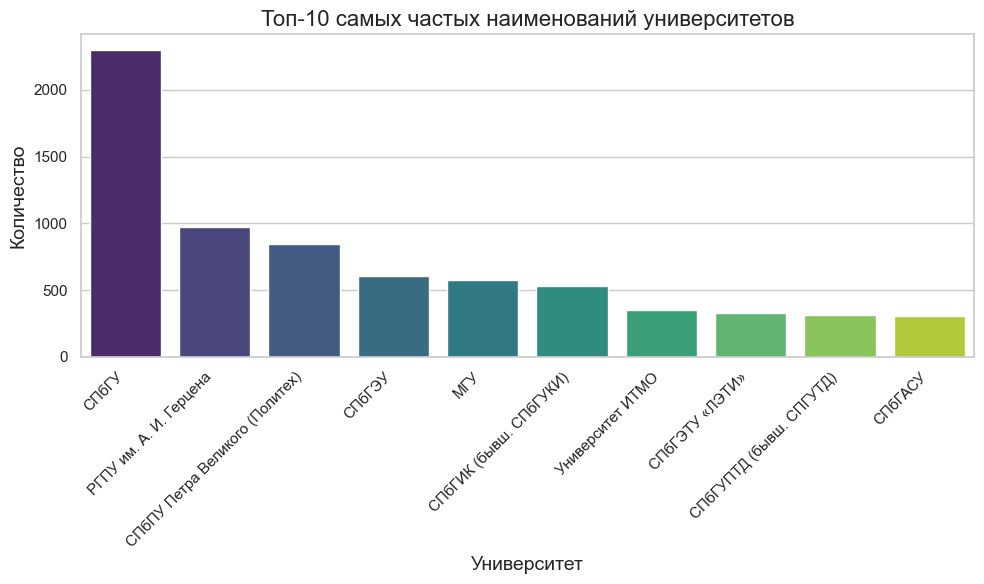

In [771]:
top_10_universities = d['university_name'].value_counts()[:10] #Топ 10 самых частых наименований университетов

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_universities.index, y=top_10_universities.values, palette='viridis')
plt.title('Топ-10 самых частых наименований университетов', fontsize=16)
plt.xlabel('Университет', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

Видно, что выпускники и студенты МГУ попали в топ 10. 
Очень много выпускников из Санкт-Петербурга состоят в группах НКО. Это связано с тем, что самая многочисленная группа Экологическое движение «РазДельный Сбор» базируется в Санкт-Петербурге. 

Теперь посмотрим на группы университетов

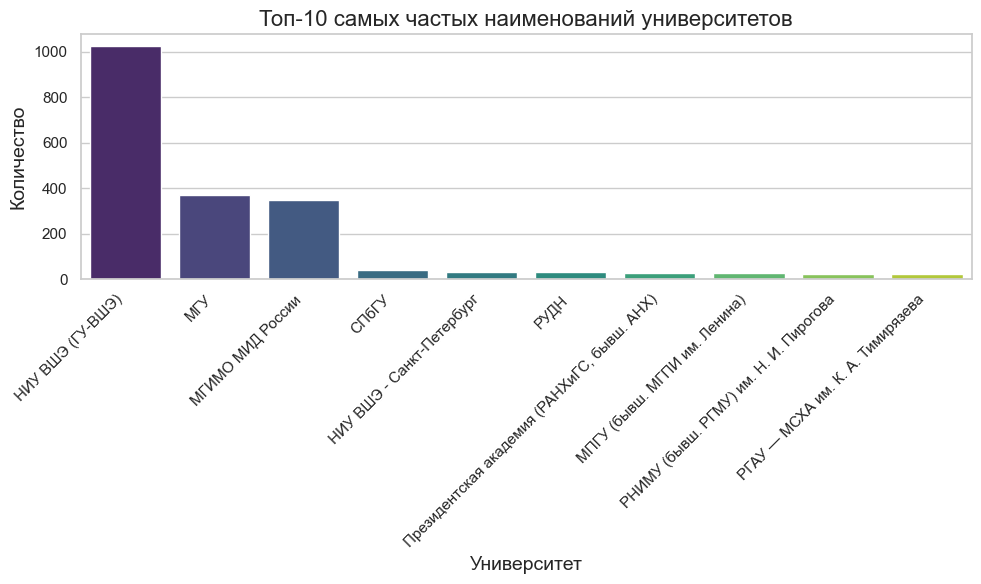

In [775]:
top_10_universities = d_u['university_name'].value_counts()[:10] #Топ 10 самых частых наименований университетов

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_universities.index, y=top_10_universities.values, palette='viridis')
plt.title('Топ-10 самых частых наименований университетов', fontsize=16)
plt.xlabel('Университет', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

***Закономерно, что в топ 3 входят именно те университеты, по чьи группам мы смотрели учатников. Однако, стоит выделить СПБГУ. Учащиеся этого Вуза на 4-м месте. Закономерно, также, что кампус Вышки в Санкт-Петербурге также находится в топе (5 место).***

#### Пол

Преобразуем sex формата 1/2 в строковый формат Male/Female.

In [790]:
sex_maping = {
    1: "Female",
    2: "Male",
    0: "не указано"
}
d['sex'] = d['sex'].astype(int)
d['gender'] = d['sex'].map(sex_maping)
d_u['sex'] = d_u['sex'].astype(int)
d_u['gender'] = d_u['sex'].map(sex_maping)
d.sample(3)

,id,group,bdate,first_name,last_name,home_town,interests,university_name,faculty_name,graduation,sex,relation,gender
79835,372609019,Экологическое движение «РазДельный Сбор»,NaN,Kristina,Gnatenko,NaN,NaN,РГГМУ,Экологический факультет,2020.0,1,0.0,Female
51256,54866042,Экологическое движение «РазДельный Сбор»,NaN,Нина,Трубицина,NaN,NaN,NaN,NaN,NaN,2,NaN,Male
101533,232708126,"Круг Жизни, Межрегиональный Центр, АНО",NaN,Tra,Tata,NaN,NaN,NaN,NaN,NaN,1,NaN,Female


In [834]:
d_gender = d[d['gender'] != 'не указано']['gender'].value_counts(normalize=True)
lst_d = d_gender.tolist()
d_u_gender = d_u[d_u['gender'] != 'не указано']['gender'].value_counts(normalize=True)
lst_d_u = d_u_gender.tolist()

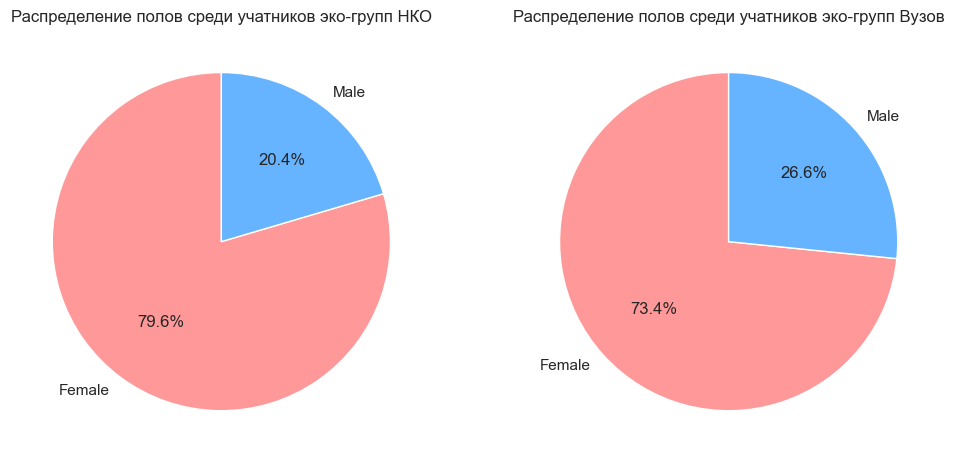

In [828]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
labels = ['Female', 'Male']
colors = ['#ff9999', '#66b3ff']
axes[0].pie(lst_d, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Распределение полов среди учатников эко-групп НКО')
axes[1].pie(lst_d_u, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Распределение полов среди учатников эко-групп Вузов')
plt.show()

***Видно, что в обеих группах распределение полов примерно одинаковое. Доминируют девушки - их примерно в 3 раза больше, чем парней. Можно предположить, что девушкам более интересна тема экологии, чем молодым людям.***